In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train= pd.read_csv("../input/titanic/train.csv")
test= pd.read_csv("../input/titanic/test.csv")

train['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
df = pd.concat([train,test])

In [3]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  train_test   1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


* Age está com bastante null-values que podem ser substituídos pela média ou mediana dependendo da distribuição das idades ou talvez 'adivinhada' por um algoritimo de machine learning.
* Cabin falta bastante valores. Um valor único pode ser atribuído aos que faltam.
* Embarked está com dois valores faltando, caso esta variável for utilizada essas duas linhas poderão ser removidas.

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  train_test   418 non-null    int64  
 12  Survived     0 non-null      float64
dtypes: float64(3), int64(5), object(5)
memory usage: 42.6+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


### Valores numéricos

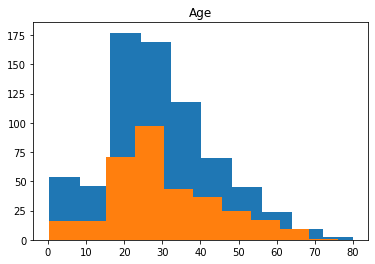

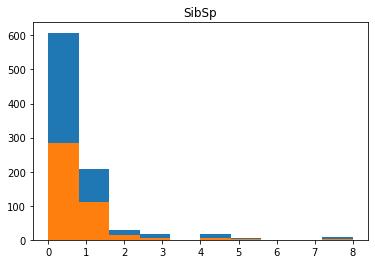

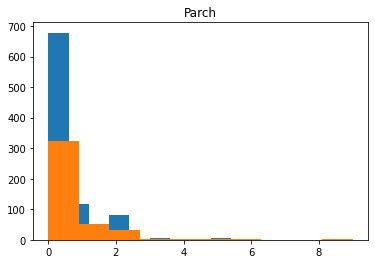

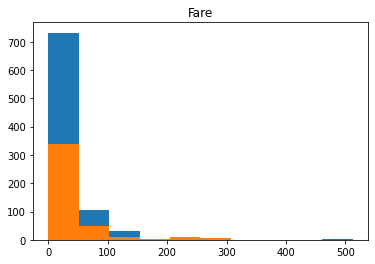

In [7]:
for i in ['Age', 'SibSp','Parch','Fare']:
    plt.hist(train[i])
    plt.hist(test[i])
    plt.title(i)
    plt.show()

Somente Age está normalizado, SibSp, Parch e Fare terão que ser modificados com alguma técnica de normalização.

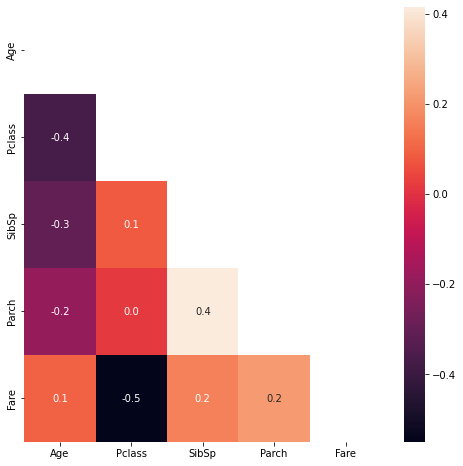

In [8]:
corr=train[['Age','Pclass', 'SibSp', 'Parch','Fare']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8,8))
sns.heatmap(corr, mask=mask, annot=True, fmt='.1f')
plt.show()

In [9]:
pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


### Valores categóricos

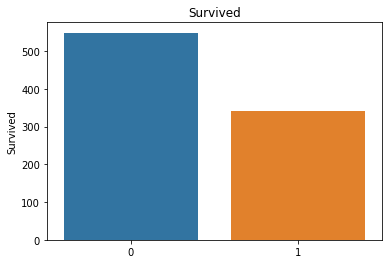

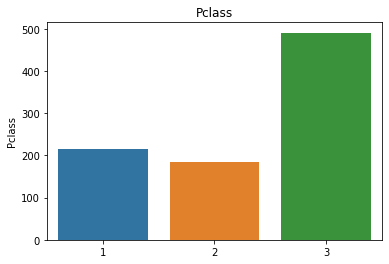

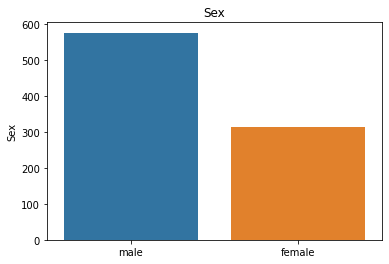

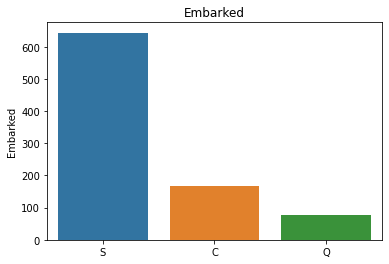

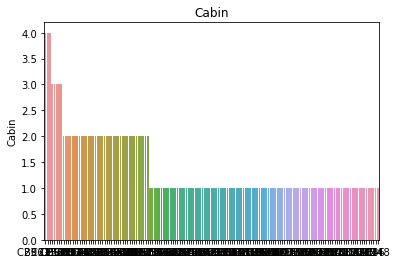

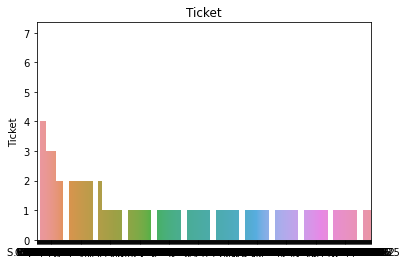

In [10]:
for i in ['Survived','Pclass','Sex','Embarked','Cabin','Ticket']:
    sns.barplot(x=train[i].value_counts().index,y=train[i].value_counts()).set_title(i);
    plt.show();

Talvez podemos usar Feature Engineering em Cabin e Ticket.

Vamos normalizar...

In [11]:
df['haveAge']=df.Age.apply(lambda x: 1 if pd.isna(x) else 0)

In [12]:
df.Age=df.Age.fillna(df.Age.mean())
df.Fare=df.Fare.fillna(df.Fare.median())
df.Pclass=np.log(df.Pclass+1)
df.SibSp=np.log(df.SibSp+1)
df.dropna(axis=0, subset=['Embarked'],inplace = True)

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,haveAge
0,1,0.0,1.386294,"Braund, Mr. Owen Harris",male,22.0,0.693147,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1.0,0.693147,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0.693147,0,PC 17599,71.2833,C85,C,1,0
2,3,1.0,1.386294,"Heikkinen, Miss. Laina",female,26.0,0.000000,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1.0,0.693147,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0.693147,0,113803,53.1000,C123,S,1,0
4,5,0.0,1.386294,"Allen, Mr. William Henry",male,35.0,0.000000,0,373450,8.0500,NaN,S,1,0


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled=df.copy()
df_scaled[['Pclass', 'Age','SibSp','Parch','Fare']]=scaler.fit_transform(df_scaled[['Pclass', 'Age','SibSp','Parch','Fare']])

In [15]:
df_scaled.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,haveAge
0,1,0.0,0.807005,"Braund, Mr. Owen Harris",male,-0.610663,0.930628,-0.445407,A/5 21171,-0.501839,NaN,S,1,0
1,2,1.0,-1.612351,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.633944,0.930628,-0.445407,PC 17599,0.736023,C85,C,1,0
2,3,1.0,0.807005,"Heikkinen, Miss. Laina",female,-0.299511,-0.616256,-0.445407,STON/O2. 3101282,-0.488790,NaN,S,1,0
3,4,1.0,-1.612351,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.400581,0.930628,-0.445407,113803,0.384512,C123,S,1,0
4,5,0.0,0.807005,"Allen, Mr. William Henry",male,0.400581,-0.616256,-0.445407,373450,-0.486373,NaN,S,1,0


In [16]:
melt=pd.melt(df_scaled[(df_scaled['Survived'] == 1)| (df_scaled['Survived'] == 0)][['Survived', 'Age','Pclass', 'SibSp', 'Parch','Fare']],id_vars="Survived", var_name="features", value_name='value')

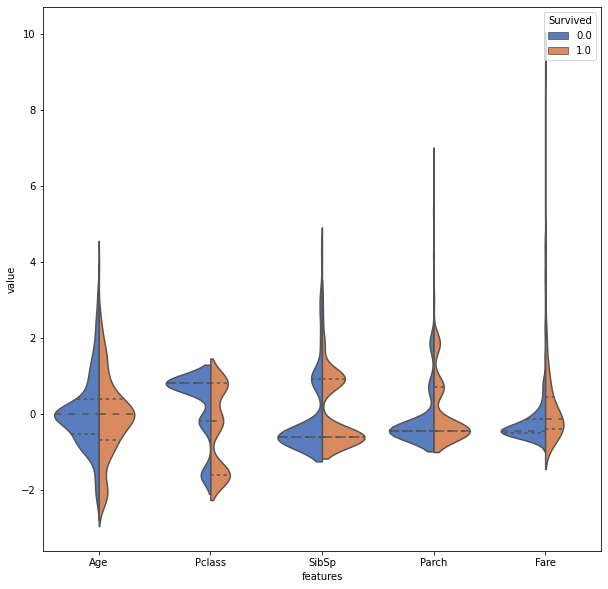

In [17]:
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Survived", data=melt, palette="muted", split=True, inner="quart")
plt.show()

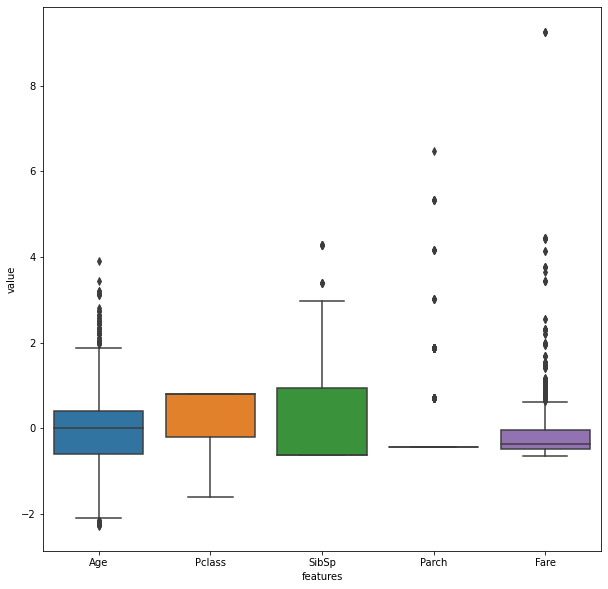

In [18]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", data=melt)
plt.show()

In [19]:
df_scaled.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,haveAge
0,1,0.0,0.807005,"Braund, Mr. Owen Harris",male,-0.610663,0.930628,-0.445407,A/5 21171,-0.501839,NaN,S,1,0
1,2,1.0,-1.612351,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.633944,0.930628,-0.445407,PC 17599,0.736023,C85,C,1,0
2,3,1.0,0.807005,"Heikkinen, Miss. Laina",female,-0.299511,-0.616256,-0.445407,STON/O2. 3101282,-0.488790,NaN,S,1,0
3,4,1.0,-1.612351,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.400581,0.930628,-0.445407,113803,0.384512,C123,S,1,0
4,5,0.0,0.807005,"Allen, Mr. William Henry",male,0.400581,-0.616256,-0.445407,373450,-0.486373,NaN,S,1,0


In [20]:
df_dummies=pd.get_dummies(df_scaled[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','train_test']])
x_train= df_dummies[df_dummies['train_test']==1]
x_test= df_dummies[df_dummies['train_test']==0]
y_train=df[df['train_test']==1]['Survived']

In [21]:
print(x_train.shape)
print(y_train.shape)

(889, 11)
(889,)


In [22]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
yhat = clf.predict(x_test)
yhat=yhat.astype(int)

In [23]:
final_data = {'PassengerId': df_scaled[df_scaled['train_test']==0].PassengerId, 'Survived': yhat}
submission = pd.DataFrame(data=final_data)

In [24]:
submission.to_csv('submission.csv', index =False)